
=== Evaluation Metrics ===
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.881503   0.893082  0.975945  0.932677  0.878725
1     K-Nearest Neighbors  0.832370   0.903114  0.896907  0.900000  0.819431
2  Support Vector Machine  0.881503   0.885802  0.986254  0.933333  0.838738
3           Decision Tree  0.809249   0.906137  0.862543  0.883803  0.694908
4           Random Forest  0.806358   0.902878  0.862543  0.882250  0.863418


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/

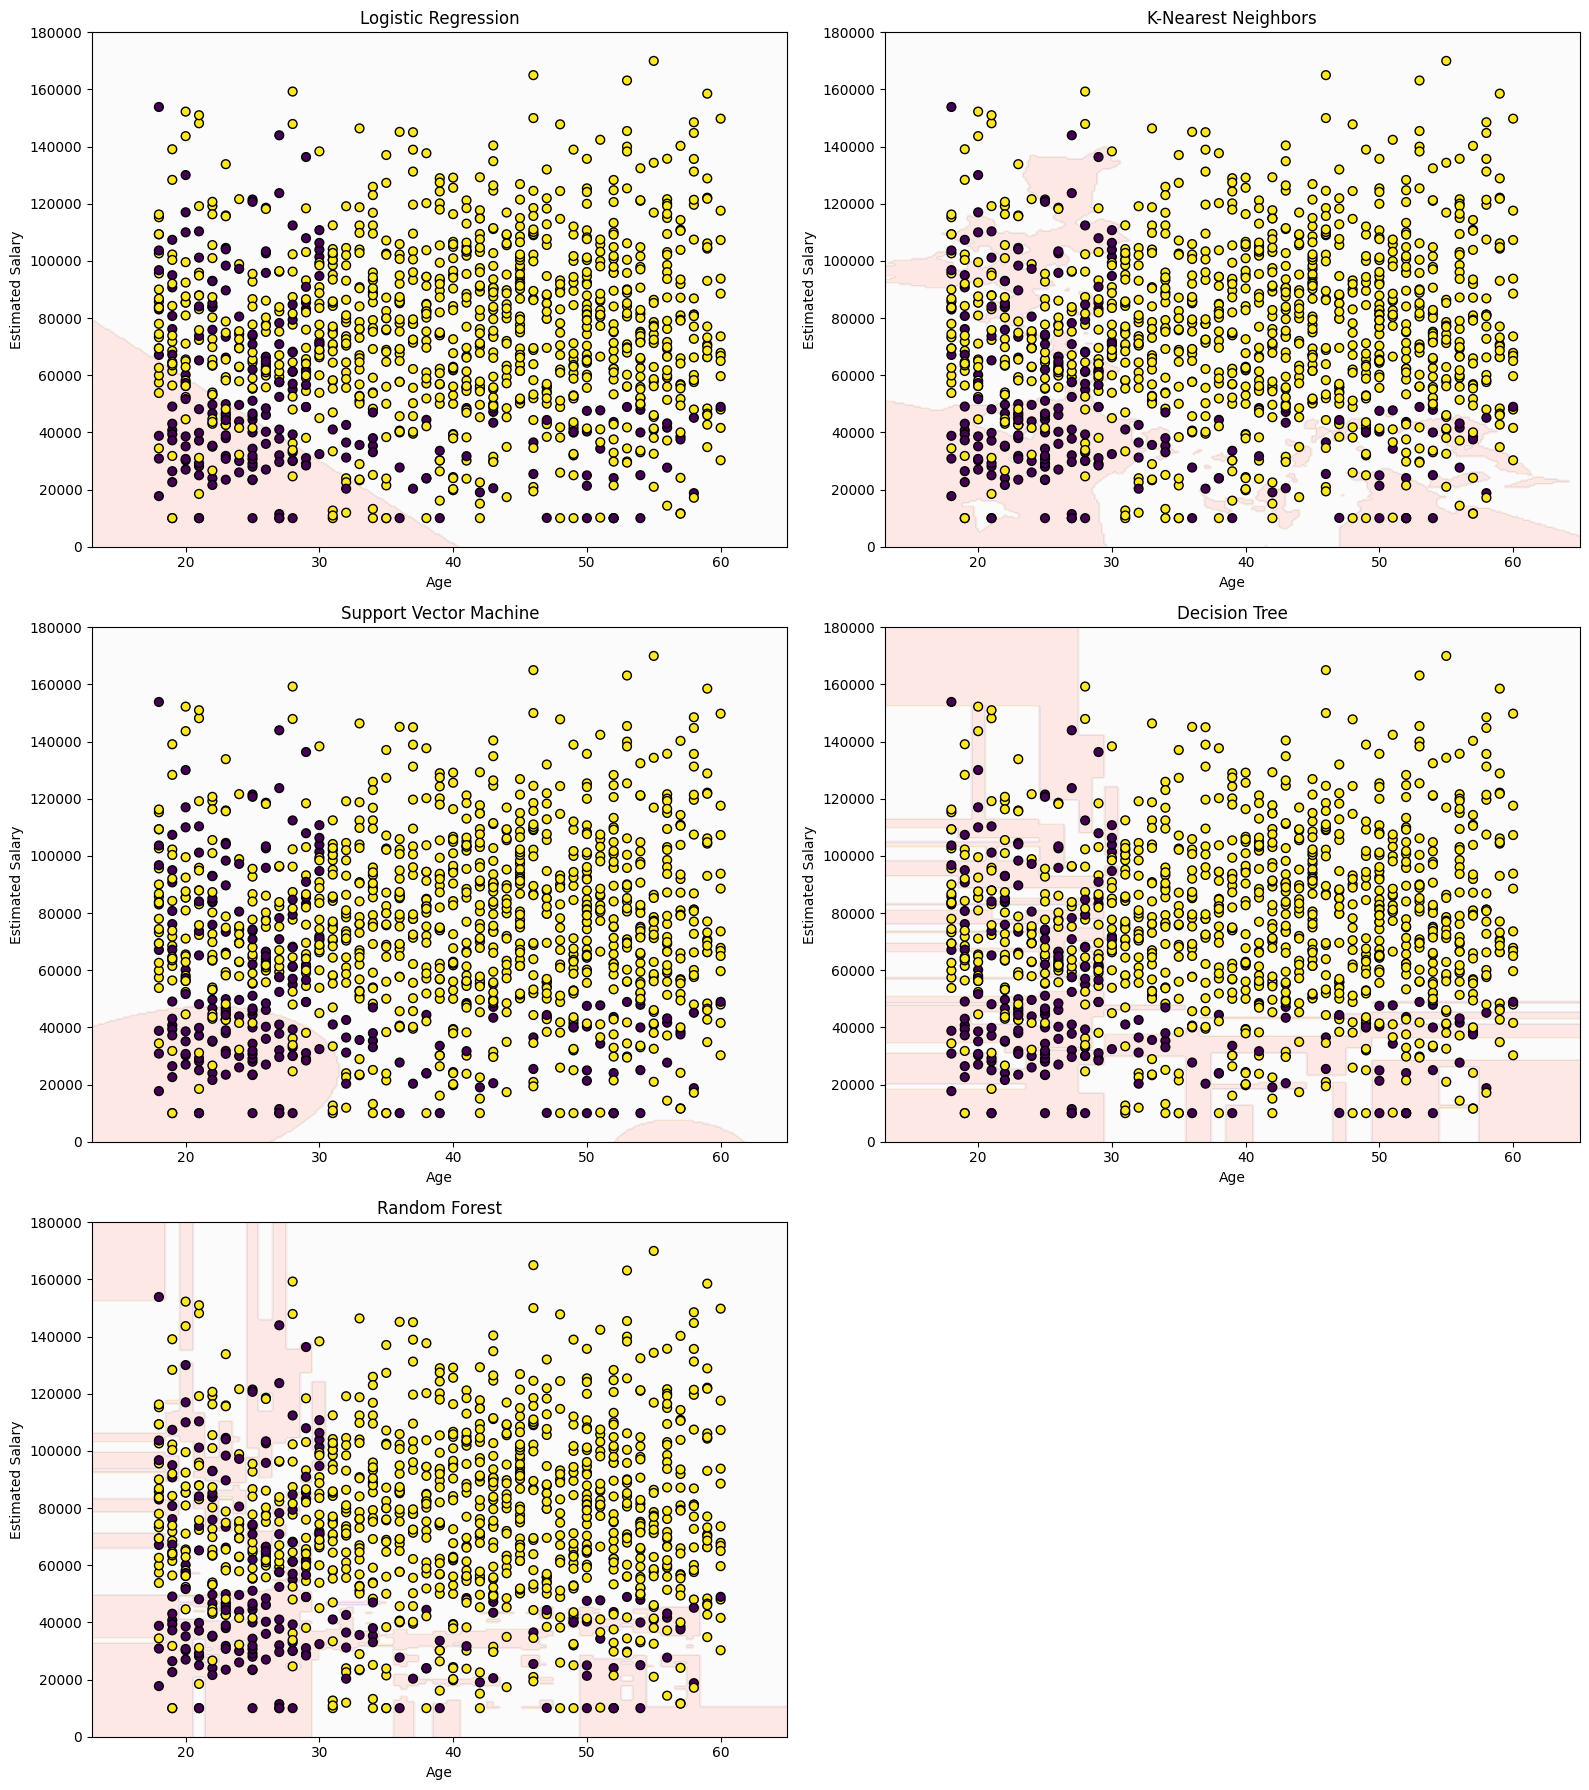

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
data = pd.read_csv("insurance_data.csv")

# Features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Display results
results_df = pd.DataFrame(results)
print("\n=== Evaluation Metrics ===")
print(results_df)

# Plotting function
def plot_real_values_boundary(model, scaler, ax, title):
    # Create grid in original scale
    age_range = np.linspace(X['Age'].min()-5, X['Age'].max()+5, 300)
    salary_range = np.linspace(X['EstimatedSalary'].min()-10000, X['EstimatedSalary'].max()+10000, 300)
    xx, yy = np.meshgrid(age_range, salary_range)

    # Flatten and scale grid for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
    ax.scatter(X['Age'], X['EstimatedSalary'], c=y, edgecolors='k', cmap='viridis', s=40)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Age")
    ax.set_ylabel("Estimated Salary")

# Plot all models in one big figure
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    plot_real_values_boundary(model, scaler, axes[i], title=name)

# Remove the 6th unused subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [3]:
models['Random Forest'].predict(scaler.transform([[22, 25000]]))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [4]:
models['Support Vector Machine'].predict(scaler.transform([[22, 25000]]))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [5]:
models['K-Nearest Neighbors'].predict(scaler.transform([[22, 25000]]))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [6]:
models['Logistic Regression'].predict(scaler.transform([[22, 25000]]))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [8]:
models['Logistic Regression'].predict(scaler.transform([[22, 25000]]))[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0